<a href="https://colab.research.google.com/github/t200056/stream/blob/main/2)_%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지능에이전트 맛보기(합불 분류 모델)


# **1. 데이터 탐색**

In [1]:
# 1) 파이선 라이____리 사용 준비

!pip install streamlit
import streamlit as st       #웹앱 제작용 라이브러리 streamlit (별명 : st)

!pip install koreanize-matplotlib
import koreanize_matplotlib    # 그래프에 한글 표시

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.7 MB/s eta 0:00:00


In [2]:
# 2) 데이터 수집

import pandas as pd       # pandas 라이브러리 (별명 : ___)  사용 준비

df = pd.read_excel('/content/성적분류.xlsx')    # '성적분류.xlsx 파일을
                                                      # pandas 데이터프레임(이름은 ___)으로 저장하자.

In [3]:
# 3) 데이터프레임 df를 출__해보자

df

,시간,합격여부
0,7.7,1
1,1.1,0
2,1.5,1
3,3.8,0
4,1.9,0
5,2.5,0
6,2.7,0
7,2.7,0
8,3.3,0
9,3.3,1


In [4]:
# 4) 데이터가 너무 많지? 상위 ___개의 데이터만 살펴보자 (데이터 탐색)

df.head()

,시간,합격여부
0,7.7,1
1,1.1,0
2,1.5,1
3,3.8,0
4,1.9,0


# **2. 데이터 시각화**

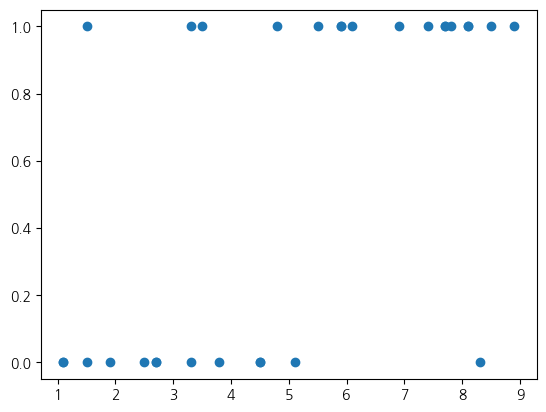

In [5]:
# 5) 데이터 시각화1(차트 종류 : 산점도)

import matplotlib.pyplot as plt      # 맵플롯립 라이브러리(별명 : ___) 불러오기

plt.scatter(df['시간'],df['합격여부'])     # plt.scatter(x축 변수: ______ , y축 변수: _____)
plt.show()

In [6]:
# 6) 시간과 합격여부는 관계가 있을까?

df.corr()      #  변수 간  상__관계를 출력

,시간,합격여부
시간,1.000000,0.604933
합격여부,0.604933,1.000000




---



# **3. 기계학습 모델 만들기**

In [7]:
# 7) 독립변수(feature), 종속변수(target) 설정

#     독립변수(feature)   : 시간
#     종속변수(target)     : 합격여부

x = df [  [ '시간' ]  ]       #  독립변수(x) : 2차원 배열로 설정
y = df [ '합격여부' ]       #  종속변수(y) : 1차원 배열로 설정

In [ ]:
# 8) x를 __개만 출력해보자.

x.head()

In [ ]:
#9) y를 출력해보자

y.head()

In [8]:
# 10) x와 y를 훈___ 데이터(70%)와 테___ 데이터(30%)로 나누자

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
# 11) X_test에는 데이터가 총 몇 건일까? _____ 건

X_test

In [9]:
# 12)  모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()          # 내가 만든 모델명은? _______

In [10]:
# 13) 모델 학___

model.fit(X_train, Y_train)               # 모델명.fit(독립변수, 종속변수)

LogisticRegression()

In [11]:
# 14) 모델 예___

p = model .predict(X_test)                   #  모델명.predict( 독립변수 )

In [12]:
# 15) 모델 평___

s = model. score ( X_test, Y_test)                   # 모델명.score( 테스트 데이터 )
s = round(s,2)
s

0.89

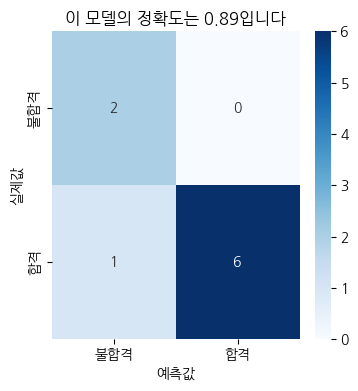

In [13]:
# 16)  평가 결과를 혼동 행렬로 시각화하여 저__하자.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, p)    # 테스트데이터의 예측 결과를 혼동행렬로 나타내자.

import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues',
             xticklabels=['불합격', '합격'],
             yticklabels=['불합격', '합격'])
plt.title('이 모델의 정확도는 ' + str(s) + '입니다')
plt.xlabel('예측값')
plt.ylabel('실제값')

plt.savefig('chart.png')

In [14]:
# 17) 내가 만든 기계학습 모델을 파일로 저__하자

import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# **4. 웹앱 만들기**

In [15]:
# 18) 스트림릿 app.py 파일 생성
%%writefile app.py
import streamlit as st

#  기계학습 모델 파일 로드(모델명 : _______)
import joblib
model = joblib.load('logistic_regression_model.pkl')

# 만든 모델로 테스트 데이터에 대해 예측하기
st.title('합불 분류 지능에이전트')

col1, col2 = st.columns(2)

with col1:
      st.subheader(' 1. 기계학습 모델 제작과정 ')
      st.write(' - 기계학습 알고리즘 : 로지스틱 회귀 ')
      st.write(' - 학습 데이터 출처 : https://www.kaggle.com/')
      st.write(' - 총 데이터 건 수: 30건')
      st.write(' - 훈련    데이터 : 21건')
      st.write(' - 테스트 데이터 : 9건')
with col2:
      st.subheader('2. 기계학습 모델 평가')
      image_path = '/content/chart.png' # 로컬 이미지 파일 경로
      st.image(image_path )   # 이미지 불러오기

st.subheader('3. 지능 에이전트 활용 방법 ')
st.write('**** 공부시간을 입력하세요.. 인공지능이 당신의 합격/불합격 분류 결과를 알려드립니다!')

# 사용자 입력
a = st.number_input("공부시간", min_value=0)

# 예측 버튼 만들기
if st.button("인공지능의 분류 결과"):
        input_data = [[a]]
        p = model.predict(input_data)
         # 단순 조건문으로 예측 결과 출력
        if p[0] == 1:
              st.success('인공지능 분류 결과는 합격입니다........... 그러나, 방심은 금물입니다!')
        else:
              st.success('인공지능 분류 결과는 불합격입니다.......... 더 열심히 공부하면 됩니다!')

Writing app.py


# **5. 웹앱 배포**

In [17]:
# 19) 내가 만든 웹앱 열기

import urllib
print('***** ↓ 바로 아래 아이피를 복사할 것 /  ↓ ↓ ↓ 맨 아래 your url is~~~~  클릭하고 /  Tunnel password 에 붙여넣기 *******\n\n',urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
!npm install localtunnel
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501

***** ↓ 바로 아래 아이피를 복사할 것 /  ↓ ↓ ↓ 맨 아래 your url is~~~~  클릭하고 /  Tunnel password 에 붙여넣기 *******

 34.138.60.117

up to date, audited 23 packages in 462ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
your url is: https://cyan-items-bathe.loca.lt
^C
